In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_column(files, model):
    loaded_model = load_model(model)
    column = []
    for item in files:
        df = pd.read_csv(item)
        train_data = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
           "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
           "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
        predictions = loaded_model.predict(train_data)
        positive_count = np.sum(predictions > 0.5)
        positive_rate = positive_count / len(predictions)
        column.append(positive_rate)
    return column

In [3]:
EID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/electronID_w_track_95"
MID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/muonID_w_track_99"
PPID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/pi+_ID_w_track_86"
PMID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/pi-_ID_w_track_81"
PHID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/photon_ID_w_track_89"

filenames = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_photon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_klong_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi0_0_10000.csv']


385/385 [==============================] - 0s 276us/step


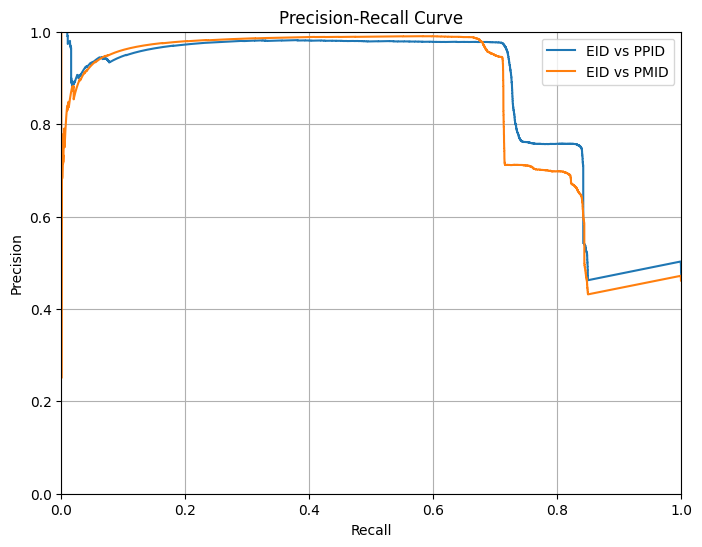

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def load_and_predict(model_path, file_path):
    model = load_model(model_path)
    df = pd.read_csv(file_path)
    X = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
            "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
            "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
    predictions = model.predict(X)
    return predictions

def plot_precision_recall_curve(y_true, y_scores, label):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, label=label)

# Assuming binary classification with 1 for positive class (electron) and 0 for negative (others)
# Adjust file paths and model paths as necessary
electron_file = '/Users/wongdowling/Desktop/DQ_Dowling/pyroot/prepare_new_NN/csv_manual_gpz/p5_80_electron_0_10000.csv'
ppid_file = '/Users/wongdowling/Desktop/DQ_Dowling/pyroot/prepare_new_NN/csv_manual_gpz/p5_80_pi+_0_10000.csv'
pmid_file = '/Users/wongdowling/Desktop/DQ_Dowling/pyroot/prepare_new_NN/csv_manual_gpz/p5_80_pi-_0_10000.csv'

# Load models
EID = "/Users/wongdowling/Desktop/DQ_Dowling/pyroot/NNs/electronID_w_track_95"
MID = "/Users/wongdowling/Desktop/DQ_Dowling/pyroot/NNs/muonID_w_track_99"
PPID = "/Users/wongdowling/Desktop/DQ_Dowling/pyroot/NNs/pi+_ID_w_track_86"
PMID = "/Users/wongdowling/Desktop/DQ_Dowling/pyroot/NNs/pi-_ID_w_track_81"
PHID = "/Users/wongdowling/Desktop/DQ_Dowling/pyroot/NNs/photon_ID_w_track_89"

# Predict scores
eid_scores_electron = load_and_predict(EID, electron_file)
ppid_scores_piplus = load_and_predict(PPID, ppid_file)
pmid_scores_piminus = load_and_predict(PMID, pmid_file)

# Prepare y_true and y_scores for precision-recall curve plotting
# This part depends on how your data is labeled and may need adjustment
y_true_eid_ppid = [1] * len(eid_scores_electron) + [0] * len(ppid_scores_piplus)
y_scores_eid_ppid = np.concatenate([eid_scores_electron, 1 - ppid_scores_piplus])

y_true_eid_pmid = [1] * len(eid_scores_electron) + [0] * len(pmid_scores_piminus)
y_scores_eid_pmid = np.concatenate([eid_scores_electron, 1 - pmid_scores_piminus])

# Plotting
plt.figure(figsize=(8, 6))  # Optionally set a figure size
plot_precision_recall_curve(y_true_eid_ppid, y_scores_eid_ppid, 'EID vs PPID')
plot_precision_recall_curve(y_true_eid_pmid, y_scores_eid_pmid, 'EID vs PMID')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')  # Adjust legend location so it doesn't overlap the plot
plt.title('Precision-Recall Curve')
plt.xlim([0, 1])  # Set x-axis limits
plt.ylim([0, 1])  # Set y-axis limits
plt.grid(True)  # Optionally add a grid for better readability
plt.show()
